In [1]:
import pandas as pd

# prompt: DateParseError: Unknown datetime string format, unable to parse: 2022-09-01 11:30 (UTC+0300)

df = pd.read_csv('Chalandri.csv') # replace with your file path
# Assuming the issue is with the timezone information in the 'Start Time' column:

# Try parsing the datetime string without the timezone information
df['Start Time'] = pd.to_datetime(df['Start Time'].str.replace(' \(UTC\+\d{4}\)', '', regex=True))

# Or, if you want to keep the timezone information, specify the format explicitly:
df['Start Time'] = pd.to_datetime(df['Start Time'], format='%Y-%m-%d %H:%M:%S \(UTC%z\)')

# Try parsing the datetime string without the timezone information
df['End Time'] = pd.to_datetime(df['End Time'].str.replace(' \(UTC\+\d{4}\)', '', regex=True))

# Or, if you want to keep the timezone information, specify the format explicitly:
df['End Time'] = pd.to_datetime(df['End Time'], format='%Y-%m-%d %H:%M:%S \(UTC%z\)')

# prompt: Now I would like to start the ten minute intervals from the beggining of the first date to the end of the last day and move Interval Consumption accordingly

def distribute_consumption_60min_full_range(df, start_col='Start Time', end_col='End Time', consumption_col='Consumption (in kWh)'):
  """
  Distributes consumption evenly across 10-minute intervals for the full date range.

  Args:
    df: The DataFrame containing start and end times and consumption.
    start_col: The name of the column containing start times.
    end_col: The name of the column containing end times.
    consumption_col: The name of the column containing consumption values.

  Returns:
    A new DataFrame with consumption distributed evenly across 10-minute intervals for the full date range.
  """

  # Convert start and end times to datetime objects
  df[start_col] = pd.to_datetime(df[start_col])
  df[end_col] = pd.to_datetime(df[end_col])

  # Determine the full date range
  start_date = df[start_col].min().replace(hour=0, minute=0, second=0)
  end_date = (df[end_col].max() + pd.Timedelta(days=1)).replace(hour=0, minute=0, second=0)

  # Generate a range of 10-minute timestamps for the full date range
  # Remove the 'closed' argument as it is causing the error.
  interval_timestamps = pd.date_range(start_date, end_date, freq='60min')

  # Create a new DataFrame with the full range of timestamps
  expanded_df = pd.DataFrame({'Interval': interval_timestamps})

  # Initialize 'Interval Consumption' to 0
  expanded_df['Interval Consumption'] = 0

  # Iterate over each row in the original DataFrame and distribute consumption
  for _, row in df.iterrows():
    start_time = row[start_col]
    end_time = row[end_col]
    consumption = row[consumption_col]

    # Calculate the number of 10-minute intervals between start and end times
    num_intervals = int((end_time - start_time).total_seconds() // 3600)

    # Calculate the consumption per 10-minute interval
    interval_consumption = consumption / num_intervals if num_intervals > 0 else consumption

    # Add the interval consumption to the corresponding timestamps in the expanded DataFrame
    mask = (expanded_df['Interval'] >= start_time) & (expanded_df['Interval'] < end_time)
    expanded_df.loc[mask, 'Interval Consumption'] += interval_consumption

  return expanded_df

# Example usage:
# Assuming your DataFrame is named 'df' and has 'Start Time', 'End Time', and 'Consumption' columns
distributed_df_full_range = distribute_consumption_60min_full_range(df)
print(distributed_df_full_range)

                 Interval  Interval Consumption
0     2022-09-01 00:00:00                   0.0
1     2022-09-01 01:00:00                   0.0
2     2022-09-01 02:00:00                   0.0
3     2022-09-01 03:00:00                   0.0
4     2022-09-01 04:00:00                   0.0
...                   ...                   ...
15980 2024-06-27 20:00:00                   0.0
15981 2024-06-27 21:00:00                   0.0
15982 2024-06-27 22:00:00                   0.0
15983 2024-06-27 23:00:00                   0.0
15984 2024-06-28 00:00:00                   0.0

[15985 rows x 2 columns]


Maximum Interval Consumption KW: 13.234990622646126
Date of Maximum Consumption: 2023-01-29 14:00:00


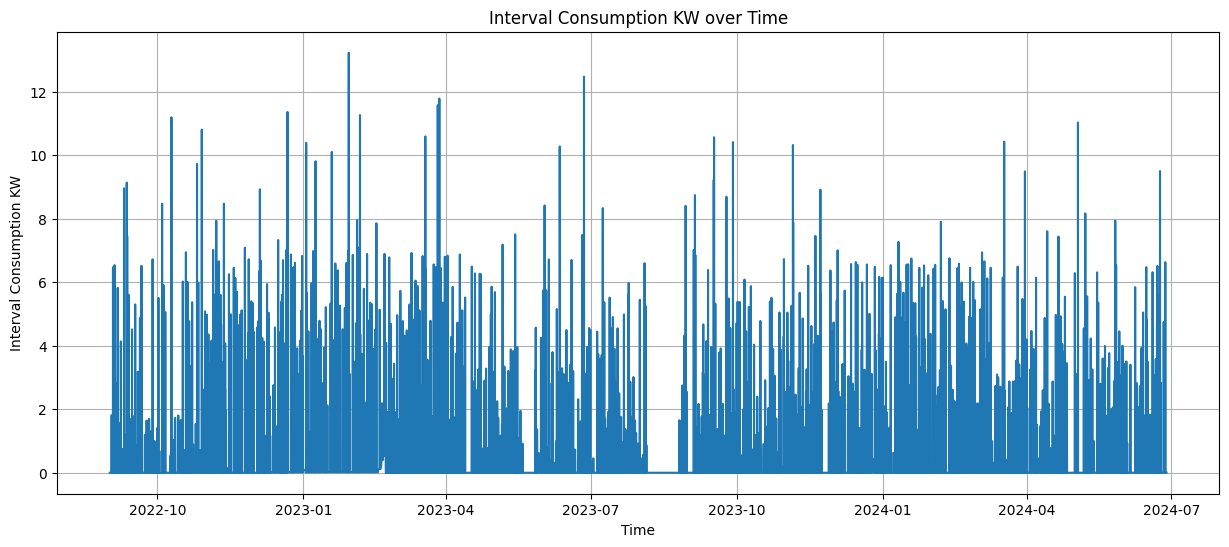

In [2]:
# prompt: find me the max value of Interval Consumption KW and the date

distributed_df_full_range_kW = distributed_df_full_range.copy()
distributed_df_full_range_kW['Interval Consumption KW'] = distributed_df_full_range['Interval Consumption'] 

# Find the maximum value of 'Interval Consumption KW'
max_consumption = distributed_df_full_range_kW['Interval Consumption KW'].max()

# Find the date corresponding to the maximum consumption
max_consumption_date = distributed_df_full_range_kW[distributed_df_full_range_kW['Interval Consumption KW'] == max_consumption]['Interval'].iloc[0]

print("Maximum Interval Consumption KW:", max_consumption)
print("Date of Maximum Consumption:", max_consumption_date)


# prompt: plot the Interval Consumption KW in time

import matplotlib.pyplot as plt
# Plot the 'Interval Consumption KW' over time
plt.figure(figsize=(15, 6))
plt.plot(distributed_df_full_range_kW['Interval'], distributed_df_full_range_kW['Interval Consumption KW'])
plt.xlabel('Time')
plt.ylabel('Interval Consumption KW')
plt.title('Interval Consumption KW over Time')
plt.grid(True)
plt.show()

In [3]:
distributed_df_full_range_kW.head(50)

,Interval,Interval Consumption,Interval Consumption KW
0,2022-09-01 00:00:00,0.000000,0.000000
1,2022-09-01 01:00:00,0.000000,0.000000
2,2022-09-01 02:00:00,0.000000,0.000000
3,2022-09-01 03:00:00,0.000000,0.000000
4,2022-09-01 04:00:00,0.000000,0.000000
5,2022-09-01 05:00:00,0.000000,0.000000
6,2022-09-01 06:00:00,0.000000,0.000000
7,2022-09-01 07:00:00,0.000000,0.000000
8,2022-09-01 08:00:00,0.000000,0.000000
9,2022-09-01 09:00:00,0.000000,0.000000


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset

# Load the dataset
df = distributed_df_full_range_kW[['Interval','Interval Consumption KW']].copy()

# Set the index to the 'Interval' column
df.set_index('Interval', inplace=True)

# Feature engineering
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek

# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
#df_scaled = df.copy()

# Convert to a supervised learning problem
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps, 0])  # Predict the consumption value
    return np.array(X), np.array(y)

n_steps = 24  # Use the past 24 hours to predict the next hour
X, y = create_sequences(df_scaled, n_steps)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [6]:
import torch.nn as nn

class Attention(nn.Module):
    def __init__(self, dim):
        super(Attention, self).__init__()
        self.attention = nn.Sequential(
            nn.Linear(dim, dim),
            nn.Tanh(),
            nn.Linear(dim, 1)
        )

    def forward(self, x):
        attn_weights = self.attention(x)
        attn_weights = torch.softmax(attn_weights, dim=1)
        context = torch.sum(attn_weights * x, dim=1)
        return context

class TCN(nn.Module):
    def __init__(self, input_size, num_channels, kernel_size=2):
        super(TCN, self).__init__()
        self.tcn = nn.Sequential(
            nn.Conv1d(input_size, num_channels, kernel_size, padding=1),
            nn.ReLU(),
            nn.Conv1d(num_channels, num_channels, kernel_size, padding=1),
            nn.ReLU()
        )

    def forward(self, x):
        x = x.transpose(1, 2)  # Change to (batch, channels, seq_length)
        x = self.tcn(x)
        x = x.transpose(1, 2)  # Back to (batch, seq_length, channels)
        return x

class EnergyConsumptionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers=2):
        super(EnergyConsumptionModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True)
        self.attention = Attention(hidden_dim)
        self.tcn = TCN(hidden_dim, hidden_dim)
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim, 64), # 256, 512, 1024
            nn.ReLU(),
            nn.Dropout(0.2), # change dropout -> 0 to almost 0.6
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        #print(lstm_out[:, -1, :].shape)
        attn_out = self.attention(lstm_out)
        tcn_out = self.tcn(lstm_out)
        combined = attn_out + tcn_out[:, -1, :]
        output = self.fc(combined)
        #output = self.fc(lstm_out)
        return output

# Instantiate the model
input_dim = X_train.shape[2]
hidden_dim = 64
output_dim = 1
model = EnergyConsumptionModel(input_dim, hidden_dim, output_dim)

# Model summary
print(model)


EnergyConsumptionModel(
  (lstm): LSTM(3, 64, num_layers=2, batch_first=True)
  (attention): Attention(
    (attention): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=1, bias=True)
    )
  )
  (tcn): TCN(
    (tcn): Sequential(
      (0): Conv1d(64, 64, kernel_size=(2,), stride=(1,), padding=(1,))
      (1): ReLU()
      (2): Conv1d(64, 64, kernel_size=(2,), stride=(1,), padding=(1,))
      (3): ReLU()
    )
  )
  (fc): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=1, bias=True)
  )
)


In [7]:
import torch.optim as optim

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Check for GPU availability and move model to GPU if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using CUDA...")
else:
    device = torch.device("cpu")
    print("GPU is not available. Using CPU...")

# Move model to the selected device
model.to(device)

#train_loader = train_loader.to(device)
#test_loader = test_loader.to(device)
# Training loop
def train_model(model, train_loader, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch.unsqueeze(1))
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')

train_model(model, train_loader, criterion, optimizer, epochs=20)


GPU is not available. Using CPU...
Epoch [1/20], Loss: 0.0101
Epoch [2/20], Loss: 0.0094
Epoch [3/20], Loss: 0.0086
Epoch [4/20], Loss: 0.0070
Epoch [5/20], Loss: 0.0068
Epoch [6/20], Loss: 0.0067
Epoch [7/20], Loss: 0.0066
Epoch [8/20], Loss: 0.0065
Epoch [9/20], Loss: 0.0064
Epoch [10/20], Loss: 0.0063
Epoch [11/20], Loss: 0.0063
Epoch [12/20], Loss: 0.0063
Epoch [13/20], Loss: 0.0062
Epoch [14/20], Loss: 0.0061
Epoch [15/20], Loss: 0.0062
Epoch [16/20], Loss: 0.0060
Epoch [17/20], Loss: 0.0060
Epoch [18/20], Loss: 0.0060
Epoch [19/20], Loss: 0.0059
Epoch [20/20], Loss: 0.0060


(3193, 1)
[0.70795205 0.17152141 0.09192994 ... 0.1677743  0.17358975 0.7060278 ]
[0. 0. 0. ... 0. 0. 0.]
Test MSE: 1.0823
Test MAE: 0.4473


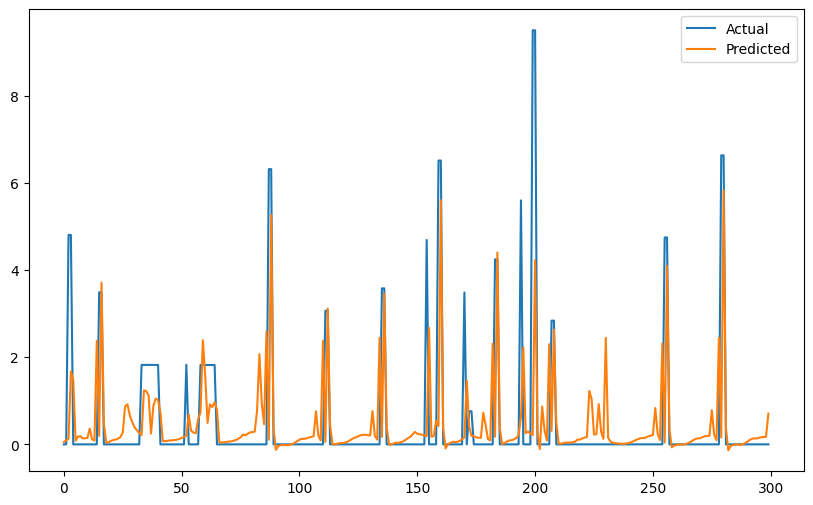

In [8]:
def evaluate_model(model, test_loader):
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            outputs = model(X_batch)
            predictions.extend(outputs.squeeze(1).cpu().numpy())
            actuals.extend(y_batch.cpu().numpy())

    predictions = np.array(predictions)
    predictions = np.array(predictions).reshape(-1, 1)
    #print(predictions.shape)
    expanded_predictions = np.zeros((len(predictions), 3))
    expanded_predictions[:, 0] = predictions[:, 0]

    predictions = scaler.inverse_transform(expanded_predictions)
    #predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    actuals = np.array(actuals)
    actuals = np.array(actuals).reshape(-1, 1)
    print(actuals.shape)
    expanded_actuals = np.zeros((len(actuals), 3))
    expanded_actuals[:, 0] = actuals[:, 0]

    actuals = scaler.inverse_transform(expanded_actuals)


    #actuals = scaler.inverse_transform(np.array(actuals).reshape(-1, 1))
    return predictions, actuals

predictions, actuals = evaluate_model(model, test_loader)

predictions = predictions[:, 0]
actuals = actuals[:, 0]

print(predictions)
print(actuals)
# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(actuals, predictions)
mae = mean_absolute_error(actuals, predictions)

print(f'Test MSE: {mse:.4f}')
print(f'Test MAE: {mae:.4f}')

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(actuals[-300:], label='Actual')
plt.plot(predictions[-300:], label='Predicted')
plt.legend()
plt.show()

In [17]:
import torch.nn as nn

class EnergyConsumptionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers=2):
        super(EnergyConsumptionModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out[:, -1, :])
        return output

# Instantiate the model
input_dim = X_train.shape[2]
hidden_dim = 64
output_dim = 1
model = EnergyConsumptionModel(input_dim, hidden_dim, output_dim)

# Model summary
print(model)

EnergyConsumptionModel(
  (lstm): LSTM(3, 64, num_layers=2, batch_first=True)
  (fc): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=1, bias=True)
  )
)


In [18]:
import torch.optim as optim

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Check for GPU availability and move model to GPU if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using CUDA...")
else:
    device = torch.device("cpu")
    print("GPU is not available. Using CPU...")

# Move model to the selected device
model.to(device)

#train_loader = train_loader.to(device)
#test_loader = test_loader.to(device)
# Training loop
def train_model(model, train_loader, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch.unsqueeze(1))
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')

train_model(model, train_loader, criterion, optimizer, epochs=20)


GPU is available. Using CUDA...
Epoch [1/20], Loss: 0.0099
Epoch [2/20], Loss: 0.0079
Epoch [3/20], Loss: 0.0069
Epoch [4/20], Loss: 0.0067
Epoch [5/20], Loss: 0.0068
Epoch [6/20], Loss: 0.0067
Epoch [7/20], Loss: 0.0067
Epoch [8/20], Loss: 0.0066
Epoch [9/20], Loss: 0.0066
Epoch [10/20], Loss: 0.0065
Epoch [11/20], Loss: 0.0065
Epoch [12/20], Loss: 0.0064
Epoch [13/20], Loss: 0.0064
Epoch [14/20], Loss: 0.0064
Epoch [15/20], Loss: 0.0064
Epoch [16/20], Loss: 0.0063
Epoch [17/20], Loss: 0.0063
Epoch [18/20], Loss: 0.0062
Epoch [19/20], Loss: 0.0062
Epoch [20/20], Loss: 0.0061


(3193, 1)
[0.60634352 0.23467573 0.09526192 ... 0.18542162 0.16393701 0.1617393 ]
[0. 0. 0. ... 0. 0. 0.]
Test MSE: 1.0462
Test MAE: 0.4418


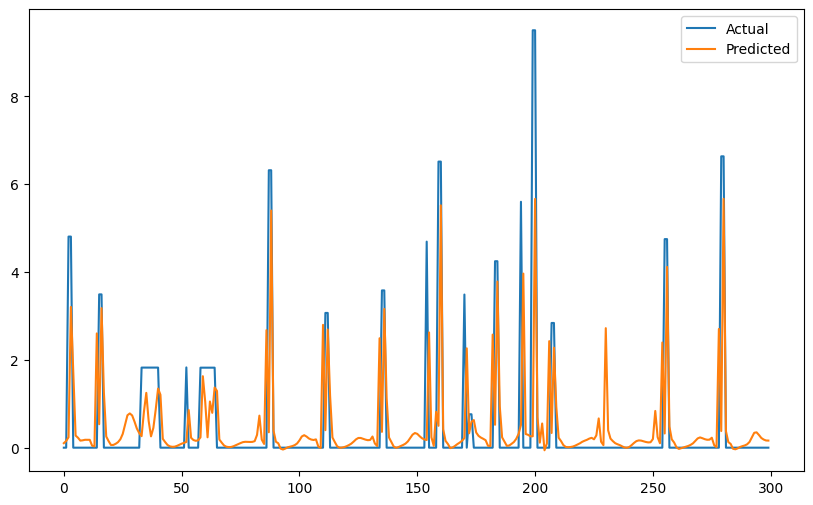

In [19]:
predictions, actuals = evaluate_model(model, test_loader)

predictions = predictions[:, 0]
actuals = actuals[:, 0]

print(predictions)
print(actuals)
# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(actuals, predictions)
mae = mean_absolute_error(actuals, predictions)

print(f'Test MSE: {mse:.4f}')
print(f'Test MAE: {mae:.4f}')

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(actuals[-300:], label='Actual')
plt.plot(predictions[-300:], label='Predicted')
plt.legend()
plt.show()

In [4]:
import torch.nn as nn

class Attention(nn.Module):
    def __init__(self, dim):
        super(Attention, self).__init__()
        self.attention = nn.Sequential(
            nn.Linear(dim, dim),
            nn.Tanh(),
            nn.Linear(dim, 1)
        )

    def forward(self, x):
        attn_weights = self.attention(x)
        attn_weights = torch.softmax(attn_weights, dim=1)
        context = torch.sum(attn_weights * x, dim=1)
        return context

class TCN(nn.Module):
    def __init__(self, input_size, num_channels, kernel_size=2):
        super(TCN, self).__init__()
        self.tcn = nn.Sequential(
            nn.Conv1d(input_size, num_channels, kernel_size, padding=1),
            nn.ReLU(),
            nn.Conv1d(num_channels, num_channels, kernel_size, padding=1),
            nn.ReLU()
        )

    def forward(self, x):
        x = x.transpose(1, 2)  # Change to (batch, channels, seq_length)
        x = self.tcn(x)
        x = x.transpose(1, 2)  # Back to (batch, seq_length, channels)
        return x

class EnergyConsumptionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers=2):
        super(EnergyConsumptionModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True)
        self.attention = Attention(hidden_dim)
        self.tcn = TCN(hidden_dim, hidden_dim)
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim, 64), # 256, 512, 1024
            nn.ReLU(),
            nn.Dropout(0.2), # change dropout -> 0 to almost 0.6
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        #print(lstm_out[:, -1, :].shape)
        attn_out = self.attention(lstm_out)
        tcn_out = self.tcn(lstm_out)
        combined = attn_out + tcn_out[:, -1, :]
        output = self.fc(combined)
        #output = self.fc(lstm_out)
        return output

# Instantiate the model
input_dim = X_train.shape[2]
hidden_dim = 64
output_dim = 1
model = EnergyConsumptionModel(input_dim, hidden_dim, output_dim)

# Model summary
print(model)


EnergyConsumptionModel(
  (lstm): LSTM(3, 64, num_layers=2, batch_first=True)
  (attention): Attention(
    (attention): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=1, bias=True)
    )
  )
  (tcn): TCN(
    (tcn): Sequential(
      (0): Conv1d(64, 64, kernel_size=(2,), stride=(1,), padding=(1,))
      (1): ReLU()
      (2): Conv1d(64, 64, kernel_size=(2,), stride=(1,), padding=(1,))
      (3): ReLU()
    )
  )
  (fc): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=1, bias=True)
  )
)


In [5]:
import torch.optim as optim

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Check for GPU availability and move model to GPU if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using CUDA...")
else:
    device = torch.device("cpu")
    print("GPU is not available. Using CPU...")

# Move model to the selected device
model.to(device)

#train_loader = train_loader.to(device)
#test_loader = test_loader.to(device)
# Training loop
def train_model(model, train_loader, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch.unsqueeze(1))
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')

train_model(model, train_loader, criterion, optimizer, epochs=20)


GPU is available. Using CUDA...
Epoch [1/20], Loss: 0.0103
Epoch [2/20], Loss: 0.0096
Epoch [3/20], Loss: 0.0083
Epoch [4/20], Loss: 0.0069
Epoch [5/20], Loss: 0.0067
Epoch [6/20], Loss: 0.0066
Epoch [7/20], Loss: 0.0066
Epoch [8/20], Loss: 0.0066
Epoch [9/20], Loss: 0.0064
Epoch [10/20], Loss: 0.0063
Epoch [11/20], Loss: 0.0064
Epoch [12/20], Loss: 0.0062
Epoch [13/20], Loss: 0.0063
Epoch [14/20], Loss: 0.0062
Epoch [15/20], Loss: 0.0061
Epoch [16/20], Loss: 0.0061
Epoch [17/20], Loss: 0.0061
Epoch [18/20], Loss: 0.0061
Epoch [19/20], Loss: 0.0060
Epoch [20/20], Loss: 0.0061


(3193, 1)
[0.96652448 0.24087854 0.25980109 ... 0.19472498 0.16437907 0.51341145]
[0. 0. 0. ... 0. 0. 0.]
Test MSE: 1.0433
Test MAE: 0.5128


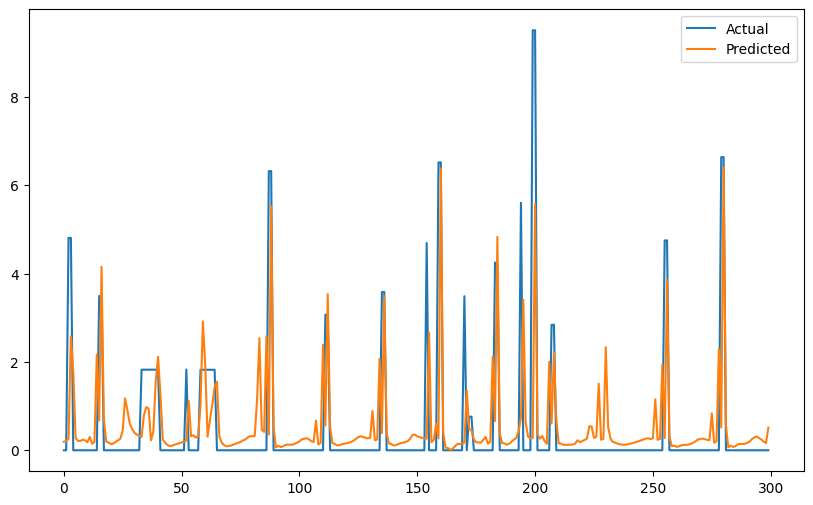

In [7]:
def evaluate_model(model, test_loader):
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            outputs = model(X_batch)
            predictions.extend(outputs.squeeze(1).cpu().numpy())
            actuals.extend(y_batch.cpu().numpy())

    predictions = np.array(predictions)
    predictions = np.array(predictions).reshape(-1, 1)
    #print(predictions.shape)
    expanded_predictions = np.zeros((len(predictions), 3))
    expanded_predictions[:, 0] = predictions[:, 0]

    predictions = scaler.inverse_transform(expanded_predictions)
    #predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    actuals = np.array(actuals)
    actuals = np.array(actuals).reshape(-1, 1)
    print(actuals.shape)
    expanded_actuals = np.zeros((len(actuals), 3))
    expanded_actuals[:, 0] = actuals[:, 0]

    actuals = scaler.inverse_transform(expanded_actuals)


    #actuals = scaler.inverse_transform(np.array(actuals).reshape(-1, 1))
    return predictions, actuals


predictions, actuals = evaluate_model(model, test_loader)

predictions = predictions[:, 0]
actuals = actuals[:, 0]

print(predictions)
print(actuals)
# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(actuals, predictions)
mae = mean_absolute_error(actuals, predictions)

print(f'Test MSE: {mse:.4f}')
print(f'Test MAE: {mae:.4f}')

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(actuals[-300:], label='Actual')
plt.plot(predictions[-300:], label='Predicted')
plt.legend()
plt.show()

In [ ]:
a =1